In [69]:
import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv("spam(2).csv", encoding = "latin-1")

In [71]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [72]:
df.shape

(5572, 5)

# We will follow some steps are :-
## 1. Data Cleaning
## 2. EDA
## 3. Text Preprocessing
## 4. Model Building
## 5. Evaluation
## 6. Improvement
## 7. Website
## 8. Deploy

# Step-1:  Data Cleaning

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [74]:
# drop last three columns
df.drop(columns =["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace = True)

In [75]:
df.shape

(5572, 2)

In [76]:
df.sample(5)

,v1,v2
4517,ham,That sucks. So what do you got planned for you...
4384,spam,Do you want a New Nokia 3510i Colour Phone Del...
3412,ham,Where do you need to go to get it?
38,ham,Anything lor... U decide...
4322,ham,Aight well keep me informed


In [77]:
# Remaining the column name
df.rename(columns = {"v1":"target","v2":"text"} , inplace = True)

In [78]:
df.sample(10)

,target,text
4917,ham,Sitting in mu waiting for everyone to get out ...
2249,spam,"Thanks for your ringtone order, ref number R83..."
1947,ham,The battery is for mr adewale my uncle. Aka Egbon
1235,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1357,ham,Good afternoon loverboy ! How goes you day ? A...
5013,ham,Hello boytoy ! Geeee ... I'm missing you today...
3308,ham,Okie Ì_ wan meet at bishan? Cos me at bishan n...
4515,spam,Congrats! 2 mobile 3G Videophones R yours. cal...
1537,ham,All sounds good. Fingers . Makes it difficult ...
3558,spam,URGENT! We are trying to contact U Todays draw...


In [79]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [80]:
df["target"] = encoder.fit_transform(df["target"])

In [81]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Check Missing Values

In [82]:
df.isnull().sum()

target    0
text      0
dtype: int64

### Check for Duplicate Values

In [83]:
df.duplicated().sum()

403

### Remove Duplicate

In [84]:
df = df.drop_duplicates(keep = "first")

In [85]:
df.duplicated().sum()

0

# Step-2 : EDA

In [86]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [87]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [88]:
import matplotlib.pyplot as plt

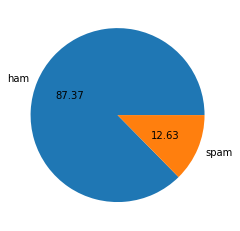

In [89]:
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct = "%0.2f")
plt.show()

In [90]:
#  Data is imbalanced
import nltk

In [91]:
!pip install nltk

In [92]:
nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [93]:
df["num_characters"] = df["text"].apply(len)

In [94]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [95]:
# Number of Words

df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [96]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [97]:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [98]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [99]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [100]:
# ham
df[df["target"] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [101]:
# spam 
df[df["target"] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [102]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

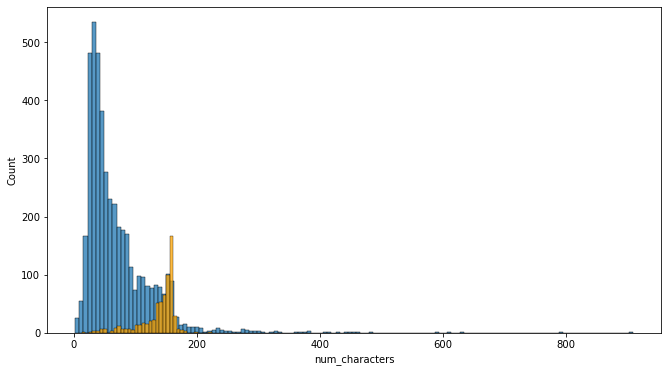

In [103]:
plt.figure(figsize=(11,6))
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"], color = "orange")

<AxesSubplot:xlabel='num_words', ylabel='Count'>

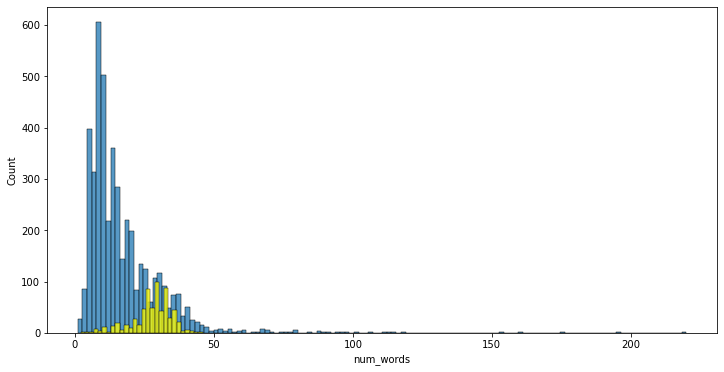

In [104]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"] == 0]["num_words"])
sns.histplot(df[df["target"] == 1]["num_words"], color = "yellow")

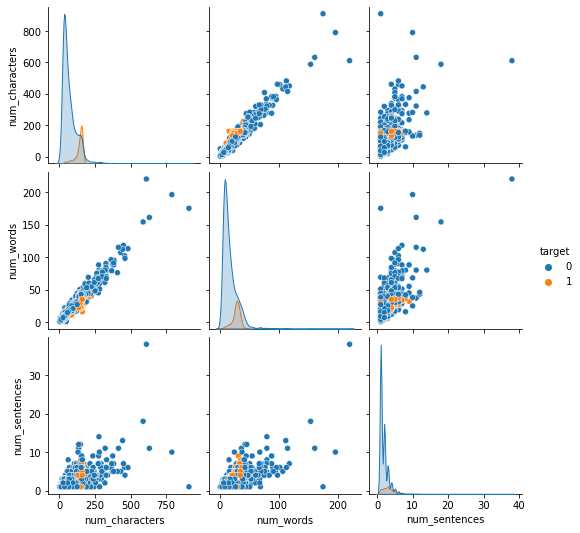

In [105]:
sns.pairplot(df, hue = "target")

<AxesSubplot:>

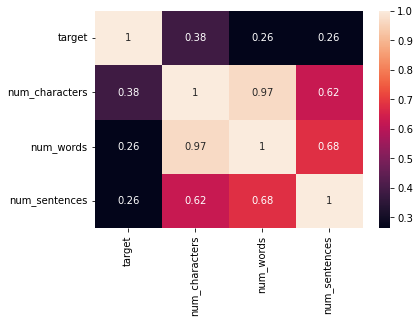

In [106]:
sns.heatmap(df.corr(), annot = True)

# Step-3 : Data Preprocessing
## * Lower case
## * Tokenization
## * Removing special characters
## * Removing stops words and punctuation
## * Stemming

In [39]:
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [107]:
from nltk.corpus import stopwords

In [108]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [113]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text =  y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
        
    
    return y
   # return text

In [114]:
transform_text("I am Working on a Project name SMS-Spam Filtering")

'work project name filter'

In [115]:
transform_text("'URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'")

'1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18'

In [116]:
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [117]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [118]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [119]:
transform_text("Hloo How Are You Ankur , ? Hello how all is going")

'hloo ankur hello go'

In [122]:
df["text"][12]

'URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

In [111]:
from nltk.stem.porter import PorterStemmer

In [112]:
ps = PorterStemmer()
ps.stem("caring")
ps.stem("Loving")

'love'

In [120]:
df["transform_text"] = df["text"].apply(transform_text)

In [121]:
df.head(3)

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [123]:
import sys
print(sys.executable)

C:\Users\vibha\anaconda4\python.exe


In [124]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [125]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")

In [ ]:
pip install --upgrade pillow

In [ ]:
spam_wc = wc.generate(df[df["target"] == 1]["transform_text"].str.cat(sep=" "))


In [ ]:
plt.figure(figsize = (10,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df["target"] == 0]["transform_text"].str.cat(sep=" "))


In [ ]:
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)

In [126]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [127]:
spam_corpus = []
for msg in df[df["target"] == 1]["transform_text"].tolist():
    for words in msg.split():
        spam_corpus.append(words)
        
    

In [128]:
len(spam_corpus)

9939

C:\Users\vibha\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


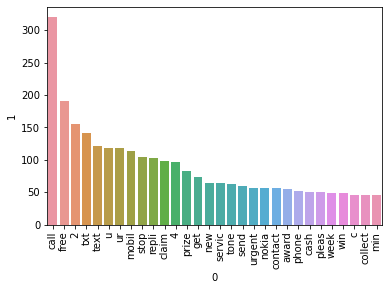

In [129]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation = "vertical")
plt.show()

In [130]:
ham_corpus = []
for msg in df[df["target"] == 0]["transform_text"].tolist():
    for words in msg.split():
        ham_corpus.append(words)
        
    

In [131]:
len(ham_corpus)

35404

C:\Users\vibha\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


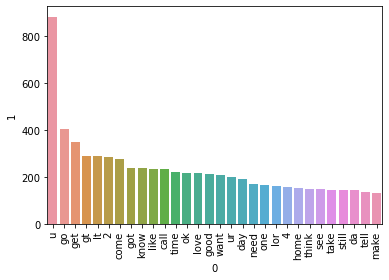

In [132]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation = "vertical")
plt.show()

# Step 4: Model Building

In [133]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfid = TfidfVectorizer()
cv = CountVectorizer()

In [134]:
x = tfid.fit_transform(df["transform_text"]).toarray()

In [135]:
x.shape

(5169, 6708)

In [136]:
y = df["target"].values

In [137]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.25, random_state = 2)

In [140]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [141]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [142]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8700696055684455
[[992 138]
 [ 30 133]]
0.4907749077490775


In [143]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9597834493426141
[[1130    0]
 [  52  111]]
1.0


In [144]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9698375870069605
[[1127    3]
 [  36  127]]
0.9769230769230769


In [145]:
# tfid --> mnb

In [146]:
from  sklearn.linear_model import LogisticRegression
from  sklearn.svm import SVC
from  sklearn.naive_bayes import MultinomialNB
from  sklearn.tree import DecisionTreeClassifier
from  sklearn.neighbors import KNeighborsClassifier
from  sklearn.ensemble import RandomForestClassifier
from  sklearn.ensemble import AdaBoostClassifier
from  sklearn.ensemble import BaggingClassifier
from  sklearn.ensemble import ExtraTreesClassifier
from  sklearn.ensemble import GradientBoostingClassifier


In [147]:
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear", penalty="l1")
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbtt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [148]:
clfs = {
    "SVC": svc,
    "KN": knc,
    "MNB": mnb,
    "DTC": dtc,
    "LR": lrc,
    "RFC": rfc,
    "ADC": abc,
    "BC": bc,
    "ETC": etc,
    "GBT": gbtt
}

In [149]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [150]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9729311678267595, 0.9776119402985075)

In [151]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,x_train, y_train, x_test, y_test)
    
    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9729311678267595
Precision -  0.9776119402985075
For KN
Accuracy -  0.9033255993812839
Precision -  1.0
For MNB
Accuracy -  0.9597834493426141
Precision -  1.0
For DTC
Accuracy -  0.9350348027842227
Precision -  0.8264462809917356
For LR
Accuracy -  0.9520494972931168
Precision -  0.9391304347826087
For RFC
Accuracy -  0.9737045630317092
Precision -  0.9923664122137404
For ADC
Accuracy -  0.9613302397525135
Precision -  0.9312977099236641
For BC
Accuracy -  0.9605568445475638
Precision -  0.868421052631579
For ETC
Accuracy -  0.9791183294663574
Precision -  0.9927536231884058
For GBT
Accuracy -  0.9505027068832174
Precision -  0.889763779527559


In [152]:
performance_df = pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy":accuracy_scores, "Precision":precision_scores}).sort_values("Precision", ascending=False)

In [153]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.903326,1.000000
2,MNB,0.959783,1.000000
8,ETC,0.979118,0.992754
5,RFC,0.973705,0.992366
0,SVC,0.972931,0.977612
4,LR,0.952049,0.939130
6,ADC,0.961330,0.931298
9,GBT,0.950503,0.889764
7,BC,0.960557,0.868421
3,DTC,0.935035,0.826446


In [154]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [155]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.903326
1,MNB,Accuracy,0.959783
2,ETC,Accuracy,0.979118
3,RFC,Accuracy,0.973705
4,SVC,Accuracy,0.972931
5,LR,Accuracy,0.952049
6,ADC,Accuracy,0.961330
7,GBT,Accuracy,0.950503
8,BC,Accuracy,0.960557
9,DTC,Accuracy,0.935035


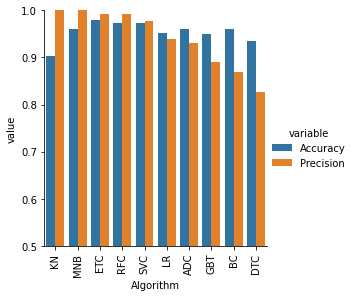

In [156]:
sns.catplot(x = 'Algorithm', y = "value", hue = "variable", data = performance_df1, kind = "bar", height=4)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = "vertical")
plt.show()

In [157]:
import pickle

In [158]:
pickle.dump(tfid, open ("vectorizer.pkl","wb"))
pickle.dump(mnb, open("model.pkl","wb"))
